In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('creditcard.csv', index_col=False)
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(data.shape)

(284807, 31)


Checking if the data has any NAN values. If there are, we need to consider either to impute values or to remove the entire rows. From the output below, there are no NAN values, saving a lot of work

In [4]:
data.isnull().values.any()

False

We do know that the data is skewed. The graphical output shows the degree of biasness of the data set. The proportion of true frauds is very low and expectedly so. Otherwise the banks will be losing lost of money due to loan defaults.

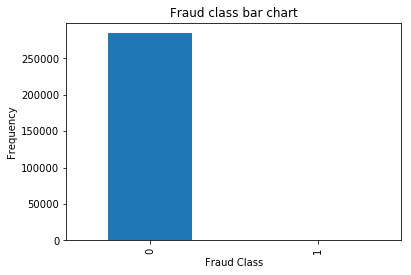

In [5]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class bar chart")
plt.xlabel("Fraud Class")
plt.ylabel("Frequency")
plt.show()

## Baseline check

The bank allows for defaults to happen based on the status quo processes and loan verification, and assume that all the loans have no risk of defaults. What then is the percentage accuracy of default happening based on the data set? 

The baseline is already 99.83%. 

In [6]:
#Default accuracy
default_predictions=[0 for i in range(len(data))]

print("Accuracy score %f" % accuracy_score(data['Class'], default_predictions))
print(classification_report(data['Class'], default_predictions))

Accuracy score 0.998273
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.00      0.00      0.00       492

avg / total       1.00      1.00      1.00    284807



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


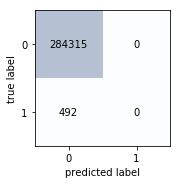

In [7]:
matrix = confusion_matrix(data['Class'], default_predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

## Some data cleaning effort

Although the data set is complete, with all the usable attributes properly scaled, we still need to pre-process the data. 2 things need to be done, (1) scale the values in the 'Amount' column into the range [-1, 1] and (2) drop the Time column. It should be safe to assume that the 'Time' column is not useful for any analysis.

In [8]:
#.values.reshape used because of deprecation
Scaler = StandardScaler().fit(data['Amount'].values.reshape(-1, 1))
data['Norm_Amount'] = Scaler.transform(data['Amount'].values.reshape(-1, 1)) 
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Norm_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


## Over and undersampling of data set

To build a learning model, I use all cases of "Class==1" from the data set (over sample). The number of such cases 492. I use the same number of samples 492 for "Class==0" data set, totalling 590 samples. The 2 data sets are then concatenate to form the 'under_sample_data' data set. This data will then be used to train the base line machine learning algorithm.

In [9]:
fraud_rows = data[data['Class'] == 1]
print(len(fraud_rows))

492


In [10]:
non_fraud_rows = data[data['Class'] == 0]
non_fraud_rows_samples = non_fraud_rows.sample(len(fraud_rows), replace=True, random_state=21)
print(len(non_fraud_rows_samples))

492


In [11]:
under_sample_data = pd.concat([non_fraud_rows_samples, fraud_rows])
#under_sample_data.head(10)

In [12]:
Y_undersample = under_sample_data['Class'].values
X_undersample = under_sample_data.drop(['Class', 'Amount'], axis=1).values

X_undersample_train, X_undersample_test, Y_undersample_train, Y_undersample_test = train_test_split (X_undersample, Y_undersample, test_size = 0.30, random_state=21)

## Baseline algorithm test

We run the data set through a set of ML algorithms using the default parameter setting, with 10-Fold validation. From there, we identify the best performing algorithm with the best accuracy values. It looks like the Logistic Regression model is the best performaing algorithm.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [14]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('LR', LogisticRegression()))
models_list.append(('LDA', LinearDiscriminantAnalysis()))

In [15]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=1)
    cv_results = cross_val_score(model, X_undersample_train, Y_undersample_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

CART: 0.888086 (0.022474)
SVM: 0.925895 (0.019852)
NB: 0.899616 (0.029086)
KNN: 0.930158 (0.021632)
LR: 0.940409 (0.020943)
LDA: 0.920119 (0.030473)


## Parameter turning

There are a few parameters that require tuning to improve the performance of the Logistic Regression algorithm - 'c_param' and 'penalty'. I use GridSearchCV method to test model thru a series of parameter values. The best settings, according to the outcome below, are C=1 and 'penalty' = l2.

In [16]:
c_param = [0.01,0.1,1,10,100]
penalty_list = ['l1', 'l2']
param_grid = {'C':c_param, 'penalty':penalty_list}
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_undersample_train, Y_undersample_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.875000 (0.033008) with: {'C': 0.01, 'penalty': 'l1'}
0.936047 (0.031376) with: {'C': 0.01, 'penalty': 'l2'}
0.937500 (0.025232) with: {'C': 0.1, 'penalty': 'l1'}
0.937500 (0.019562) with: {'C': 0.1, 'penalty': 'l2'}
0.937500 (0.020558) with: {'C': 1, 'penalty': 'l1'}
0.940407 (0.020973) with: {'C': 1, 'penalty': 'l2'}
0.938953 (0.021375) with: {'C': 10, 'penalty': 'l1'}
0.938953 (0.021375) with: {'C': 10, 'penalty': 'l2'}
0.930233 (0.030282) with: {'C': 100, 'penalty': 'l1'}
0.931686 (0.028315) with: {'C': 100, 'penalty': 'l2'}
Best: 0.940407 using {'C': 1, 'penalty': 'l2'}


## Testing the trained model on undersampled set

In [17]:
model = LogisticRegression(C=1, penalty='l2')
model.fit(X_undersample_train, Y_undersample_train)

predictions = model.predict(X_undersample_test)

From the confusion matrix output below, there are 19 cases of mis-classification out of a total of 296 cases. Accuracy of the trained model is 93.6%. It's much less than the baseline model of 99.8%

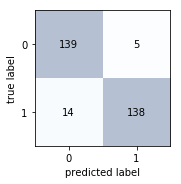

In [18]:
matrix = confusion_matrix(Y_undersample_test, predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [19]:
print("Accuracy score %f" % accuracy_score(Y_undersample_test, predictions))
print(classification_report(Y_undersample_test, predictions))

Accuracy score 0.935811
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       144
          1       0.97      0.91      0.94       152

avg / total       0.94      0.94      0.94       296



If we test the machine learning model on the entire skewed set, the accuracy increased to 96.4%. The performance improved compared to the run on the undersampled set. However, it's still worse off than the baseline 99.83%.

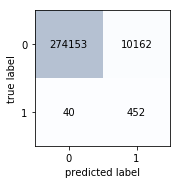

In [20]:
Y = data['Class'].values
X = data.drop(['Class', 'Amount'], axis=1).values

predictions = model.predict(X)

matrix = confusion_matrix(Y, predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [ ]:
print("Accuracy score %f" % accuracy_score(Y, predictions))
print(classification_report(Y, predictions))

Accuracy score 0.964179
             precision    recall  f1-score   support

          0       1.00      0.96      0.98    284315
          1       0.04      0.92      0.08       492

avg / total       1.00      0.96      0.98    284807



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Is it worth doing the model to predict default risk?

Assuming nothing was done, there will be 492 cases of default based on the given data set. Based on the trained machine learning model, we can pick up 452 defaults out of the 492 actual cases. Intuitively, it seems to be worthwhile to use this model to help reduce the default rate the bank is experiencing currently. 

However, we have to also consider the number detected fraud increasing from 0 to 10162. From bank's operation's point of view, there are now over 10 thousand cases of suspected fraud for the officer to review. This creates additional work and associated cost (e.g., slower approvals, unhappy customers, more manpower needed for checking)

In [ ]:
matrix = confusion_matrix(data['Class'], default_predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

matrix = confusion_matrix(Y, predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

## Improving the performance of algorithm by dimensions reduction

Noise within the dataset will affect the prediction outcome. We now try to reduce the data dimension by using PCA.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_undersample_train)

In [ ]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show ()

In [ ]:
# Pick the top 5 components with the highest variance

pca = PCA(n_components=5)
pca.fit(X_undersample_train)
X_pca_undersample_train = pca.transform(X_undersample_train)
X_pca_undersample_test = pca.transform(X_undersample_test)
X_pca = pca.transform(X)

When we test the revised algorithm on the undersampled set, the performance does not change much.

In [ ]:
model = LogisticRegression(C=1, penalty='l2')
model.fit(X_pca_undersample_train, Y_undersample_train)

predictions = model.predict(X_pca_undersample_test)
matrix = confusion_matrix(Y_undersample_test, predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

But if we used the revised model on the entire data set, the number of false detection reduced by 50% while the number of missed detection increased by 15. Intuitively, this result is better than earlier because of the manpower effort savings from reviewing the suspected default cases. The overall accuracy of the prediction model is 98.0% (although this is still lower than the baseline accuracy).

In [ ]:
predictions = model.predict(X_pca)

matrix = confusion_matrix(Y, predictions)
plot_confusion_matrix(conf_mat=matrix)
plt.show()

In [ ]:
print("Accuracy score %f" % accuracy_score(Y, predictions))
print(classification_report(Y, predictions))

## What is the tangible benefit to the bank by using this model?

To assess if deploying a model such as this provides any tangible benefits to the bank, we need to compare how much defaults the bank could have prevented versus the cost of effort needed to prevent the defaults. 

In mathematical term, we want to check for \$(default prevented) >> \$(effort to check for default)

In [ ]:
comparison_table = pd.DataFrame()
comparison_table['Amount'] = data['Amount']
comparison_table['Original_class'] = data['Class']
comparison_table['Predicted_class'] = predictions
comparison_table.head(20)

In [ ]:
detected = comparison_table['Amount'][(comparison_table['Original_class'] == 1) & (comparison_table['Predicted_class'] == 1)]
print("Total Default Amount Detected $%0.2f" % sum(detected))

Assuming that the verification of each predicted fraud case cost is $200, and we decide to verify all the predicted frauds, what is the total verification cost?

In [ ]:
predicted = comparison_table['Predicted_class'].value_counts()
print("Total predicted default cases: %d" % (predicted[1]))
print("Total Verification Cost at $200 each: $%0.2f" % (predicted[1] * 200))

The data shows that the default rate for this lender is low. The default percentage is only 0.17%. In another words, 99.83% of the debtors returned what they have borrowed. For any machine algorithm to be useful, it must be able to accurately detect these 0.17% (RECALL rate) defaults without too many false detection (Precision). Based on the AUC, performance of the machine learning tested so far is not ideal for deployment. The overall cost associated with the verification of the potential defaults is much higher than the actual defaults. 